In [1]:
# Need to pad the 3 beat segments in order to use them in a 1D architecture
# Will pad to just larger than the longest segment and will pad the edges

In [43]:
import pickle as pkl
import numpy as np
import math
from sklearn.preprocessing import StandardScaler, normalize

In [22]:
# See variation in length of segments
# Need to know longest segment in order to pad to this length
longest_length = 0
shortest_length = 0
longest_index = 0
shortest_index = 0
lengths = []
for i in range(8260):
    with open('3 Beat Train Data/seg_{}.pkl'.format(i), 'rb') as f:
        seg = pkl.load(f)
    if(i == 0):
        longest_length = len(seg[:,0])
        shortest_length = len(seg[:,0])
    else:
        if(len(seg[:,0]) > longest_length):
            longest_length = len(seg[:,0])
            longest_index = i
        if(len(seg[:,0]) < shortest_length):
            shortest_length = len(seg[:,0])
            shortest_index = i
    lengths.append(len(seg[:,0]))
print(len(lengths))
print('longest segment: ', longest_length, ' is sample number ', longest_index)
print('shortest segment: ', shortest_length, ' is sample number ', shortest_index)

8260
longest segment:  2766  is sample number  4829
shortest segment:  139  is sample number  6828


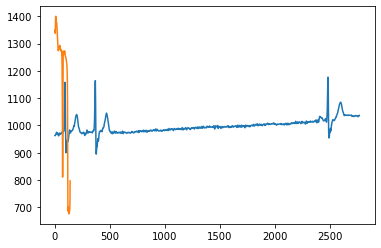

In [17]:

with open('3 Beat Train Data/seg_{}.pkl'.format(longest_index), 'rb') as f:
        long_seg = pkl.load(f)
        
with open('3 Beat Train Data/seg_{}.pkl'.format(shortest_index), 'rb') as f:
        short_seg = pkl.load(f)
        
import matplotlib.pyplot as plt
plt.figure()
plt.plot(long_seg[:,0])
plt.plot(short_seg[:,0])

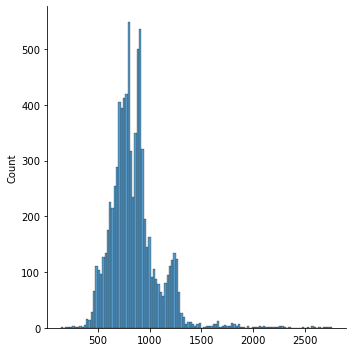

In [27]:
import seaborn as sns

sns.displot(data=lengths)

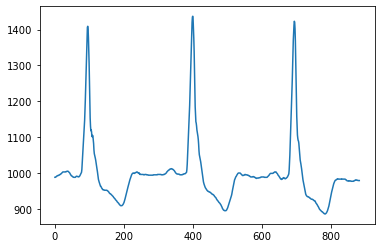

In [72]:
# Will pad up to 2800
with open('3 Beat Train Data/seg_{}.pkl'.format(1), 'rb') as f:
    seg = pkl.load(f)
plt.plot(seg[:,0])
total_length = 2800
pad = 2800 - len(seg[:,0])
padded_1 = np.pad(seg[:,0],(math.floor(pad/2),math.ceil(pad/2)),'edge')
padded_2 = np.pad(seg[:,1],(math.floor(pad/2),math.ceil(pad/2)),'edge')
beat = np.stack((padded_1,padded_2),axis=-1)


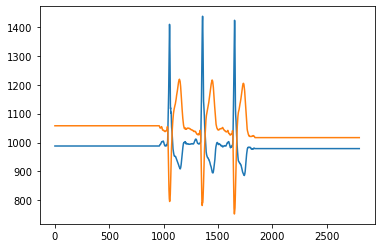

In [73]:
plt.plot(beat)

StandardScaler()
[[-0.00528608  0.28243638]
 [-0.00528608  0.28243638]
 [-0.00528608  0.28243638]
 ...
 [-0.17964383 -0.46381086]
 [-0.17964383 -0.46381086]
 [-0.17964383 -0.46381086]]


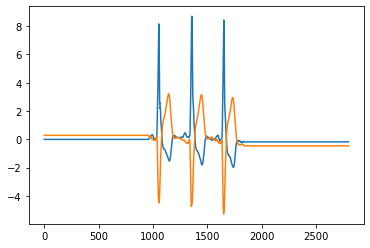

In [79]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
print(scaler.fit(beat))
print(scaler.transform(beat))
plt.figure()
scaled = scaler.transform(beat)
plt.plot(scaled)

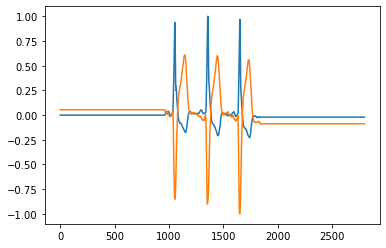

In [77]:
plt.figure()
normalized = normalize(scaled, 'max', axis=0)
plt.plot(normalized)

In [95]:
# Now scale and divide all data by their max value so all data is centred around zero and is between -1 and 1
# Will pad up to 2800
# This is a loop to perform a padding and scaling of every sample
num_of_samples = 8260
total_length = 2800
full_labels = []
train_labels = []
test_labels = []
train_count = 0
test_count = 0

with open('CNN_3_Beat_label_OHE.pkl', 'rb') as f:
    full_labels = pkl.load(f)
    
print(full_labels[1179:1182])
# cycle through all segments
for i in range(num_of_samples):
    with open('3 Beat Train Data/seg_{}.pkl'.format(i), 'rb') as f:
        segment = pkl.load(f)
    # total amount a sample needs to be padded by
    pad = total_length - len(segment[:,0])
    # pad on either side of the segment to keep it centred
    padded_1 = np.pad(segment[:,0],(math.floor(pad/2),math.ceil(pad/2)),'edge')
    padded_2 = np.pad(segment[:,1],(math.floor(pad/2),math.ceil(pad/2)),'edge')
    padded_segment = np.stack((padded_1,padded_2),axis=-1)
    # Scale and so mean is zero and variance is 1
    scaler = StandardScaler()
    scaler.fit(padded_segment)
    scaled_segment = scaler.transform(padded_segment)
    # Now divide by max value in each channel to transform values between -1 and 1
    normalized = normalize(scaled_segment, 'max', axis=0)
    # Split up the data into Train and Test folders
    if (i%1180 < 1000):
        np.save('3 Beat Scaled 1D Train/sample_{}'.format(train_count), normalized, allow_pickle = True)
        train_count += 1
        train_labels.append(full_labels[i])
    else:
        np.save('3 Beat Scaled 1D Test/sample_{}'.format(test_count), normalized, allow_pickle = True)
        test_count += 1
        test_labels.append(full_labels[i])
    if i%100 == 0:
        print(i)
print('done')
print(train_count, test_count)

# Save train and test labels
with open('1DCNN_3_Beat_Test_Labels_OHE.pkl', 'wb') as f:
    pkl.dump(test_labels, f)
with open('1DCNN_3_Beat_Train_Labels_OHE.pkl', 'wb') as f:
    pkl.dump(train_labels, f)
print(len(train_labels), len(test_labels))

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]]
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
done
7000 1260
7000 1260


In [96]:
print(train_labels[998:1002])

[array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([1., 0., 0., 0., 0., 0., 0.], dtype=float32), array([0., 1., 0., 0., 0., 0., 0.], dtype=float32), array([0., 1., 0., 0., 0., 0., 0.], dtype=float32)]


In [ ]:
with open('3 Beat Scaled 1D Train/sample_{}.npy'.format(1), 'rb') as f:
    segment1 = np.load(f)
with open('3 Beat Scaled 1D Train/sample_{}.npy'.format(6000), 'rb') as f:
    segment2 = np.load(f)
comparison = segment1 == segment2
equal_arrays = comparison.all()
print(equal_arrays)
plt.plot(segment1)
plt.plot(segment2)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3427, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-99-4f948e5db957>", line 1, in <module>
    with open('3 Beat Scaled 1D Train/sample_{}.npy'.format(1), 'rb') as f:
FileNotFoundError: [Errno 2] No such file or directory: '3 Beat Scaled 1D Train/sample_1.npy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2054, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'FileNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1101, in get_record

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


AttributeError: 'bool' object has no attribute 'all'

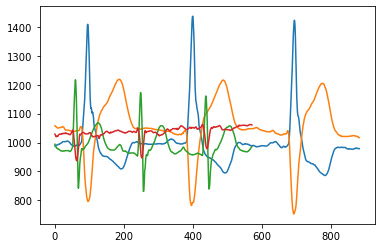

In [94]:
with open('3 Beat Train Data/seg_{}.pkl'.format(1), 'rb') as f:
    segment1 = pkl.load(f)
with open('3 Beat Train Data/seg_{}.pkl'.format(2), 'rb') as f:
    segment2 = pkl.load(f)
plt.figure()
plt.plot(segment1)
plt.plot(segment2)